Q1


In [154]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
#load dataset
data=pd.read_csv('Bengaluru_House_Data.csv')
df=data.copy()
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


# Cleaning and EDA #

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [157]:
#check for duplicates
df.duplicated().sum()

529

In [158]:
#drop the duplicates
df.drop_duplicates(inplace=True)

In [159]:
#checking for missing values
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

## Observation
- OUt of 12000 rows, nearly 5000 rows are empty for society column. This is nearly 50 %. Let's completely remove it.

In [160]:
df.drop('society',axis=1,inplace=True)

In [161]:
df['balcony'].value_counts()

2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: balcony, dtype: int64

### Handling size column


In [162]:
df['size'].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [163]:
#Let's convert all values in the form of bedroom
df['size']=df['size'].str.replace('BHK','Bedroom')
df['size'].unique()

array(['2 Bedroom', '4 Bedroom', '3 Bedroom', '6 Bedroom', '1 Bedroom',
       '1 RK', '8 Bedroom', '7 Bedroom', '5 Bedroom', '11 Bedroom',
       '9 Bedroom', nan, '27 Bedroom', '10 Bedroom', '19 Bedroom',
       '16 Bedroom', '43 Bedroom', '14 Bedroom', '12 Bedroom',
       '13 Bedroom', '18 Bedroom'], dtype=object)

In [164]:
#Let's check record for 1 rk
df[df['size']=='1 RK']

,area_type,availability,location,size,total_sqft,bath,balcony,price
24,Super built-up Area,18-Nov,Thanisandra,1 RK,510,1.0,0.0,25.25
782,Super built-up Area,Ready To Move,Thanisandra,1 RK,445,1.0,0.0,28.00
1363,Super built-up Area,21-Nov,Thanisandra,1 RK,510,1.0,1.0,25.25
2486,Super built-up Area,19-Dec,Bhoganhalli,1 RK,296,1.0,0.0,22.89
2557,Built-up Area,Ready To Move,Anekal,1 RK,351,1.0,1.0,16.00
2788,Super built-up Area,20-Aug,Rachenahalli,1 RK,440,1.0,0.0,28.00
4876,Built-up Area,Ready To Move,Electronic City,1 RK,435,1.0,1.0,19.50
5079,Built-up Area,17-Jun,Whitefield,1 RK,905,1.0,1.0,52.00
5285,Super built-up Area,18-May,Rachenahalli,1 RK,385 - 440,1.0,0.0,19.80
6586,Super built-up Area,Ready To Move,Electronics City Phase 1,1 RK,360,1.0,0.0,16.90


In [165]:
#Let's replace 1room kitchen with 0 bedroom
df['size']=df['size'].str.replace('1 RK','0 Bedroom')

In [166]:
#Let's make size to be equivalent to number of bedrooms
df['size']=df['size'].str.split(' ').str[0]

In [167]:
df['size'].fillna(int(df['size'].median()),inplace=True)

In [168]:
df['size']=df['size'].astype(int)

In [169]:
df.isna().sum()

area_type         0
availability      0
location          1
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

### Handling location


In [170]:
df[df['location'].isna()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3,1600,3.0,2.0,86.0


In [171]:
#Let's remove the record
df.drop(568,axis=0,inplace=True)

In [172]:
df.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

### Handling Bath column

In [173]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [174]:
#Let's impute based on median
df['bath'].fillna(int(df['bath'].median()),inplace=True)

In [175]:
df['bath']=df['bath'].astype(int)

In [176]:
df.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         605
price             0
dtype: int64

### Handling balcony

In [177]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [178]:
#Let's impute based on median
df['balcony'].fillna(int(df['balcony'].median()),inplace=True)

In [179]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [180]:
#change datatyp to int
df['balcony']=df['balcony'].astype(int)

### Observations
- Missing values has been handled

### handling area_type

In [181]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [182]:
#Let's encode with ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
o_encoder=OrdinalEncoder(categories=[['Super built-up  Area','Built-up  Area','Carpet  Area', 'Plot  Area']])
df['area_type_encoded']=o_encoder.fit_transform(df[['area_type']])

In [183]:
#convert it into int type
df['area_type_encoded']=df['area_type_encoded'].astype(int)

### Handling availability

In [184]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

### Observation
- This is time dependent, so let's remove the column

In [185]:
df.drop('availability',axis=1,inplace=True)

### Handling location

In [186]:
df['location'].nunique()

1305

In [187]:
#Let's label encodeit
from sklearn.preprocessing import LabelEncoder
l_encoder=LabelEncoder()
df['location_encoded']=l_encoder.fit_transform(df['location'])

### Handling total_sqft

In [188]:
for area in df['total_sqft'].unique():
    if area.isnumeric():
        pass
    else:
        print(area)
        

2100 - 2850
1330.74
3010 - 3410
2957 - 3450
3067 - 8156
1042 - 1105
1563.05
1145 - 1340
1015 - 1540
1520 - 1740
2023.71
1113.27
34.46Sq. Meter
1752.12
1195 - 1440
1200 - 2400
4125Perch
1120 - 1145
4400 - 6640
3090 - 5002
4400 - 6800
1160 - 1195
1000Sq. Meter
4000 - 5249
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
3606 - 5091
650 - 665
633 - 666
2112.95
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
1440 - 1884
1558.67
3467.86
716Sq. Meter
547.34 - 827.31
804.1
580 - 650
3425 - 3435
1269.72
1804 - 2273
3630 - 3800
660 - 670
1500Sq. Meter
620 - 933
142.61Sq. Meter
2695 - 2940
2000 - 5634
1574Sq. Yards
3450 - 3472
2479.13
2172.65
581.91
1250 - 1305
670 - 980
1005.03 - 1252.49
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
1452.55
2249.81 - 4112.19
3436 - 3643
2830 - 2882
596 - 804
1776.42
1255 - 1863
1300 - 1405
1500 - 2400
117Sq. Yards
934 - 1437
980 - 1030
1564 - 1850
1452.19
1446 - 1506
1419.59
461.82
1070 - 1315
3040Sq. Meter
500Sq. Yards
1020.07
2806 - 3019
613 - 648
1430

In [189]:
#There is a record with 3Cents as sqft. Let's remove it
df.drop(df[df['total_sqft']=='3Cents'].index[0],axis=0,inplace=True)

In [190]:
#There is a record with 1500Cents as sqft. Let's remove it
df.drop(df[df['total_sqft']=='1500Cents'].index[0],axis=0,inplace=True)

In [191]:
#Let's transform
def into_sqft(value):
    if value:
        if '-' in value:
            x=float(value.split('-')[0])
            return str(x)
        
        if 'Perch' in value:
            x=float(value.split('Perch')[0])
            #1 perch is 272.25 ft
            x=x*272.25
            return str(x)
        if 'Sq. Meter' in value:
            x=float(value.split('Sq')[0])
            #1 sq m is 10.7639
            x=x*10.7639
            return str(x)
        
        if 'Sq. Yards' in value:
            x=float(value.split('Sq')[0])
            #1 sq yard in 9
            x=x*9
            return str(x)
        
        if 'Acre' in value:
            x=float(value.split('Acre')[0])
            #1 acre in 9
            x=x*9
            return str(x)
        
        if 'Guntha' in value:
            x=float(value.split('Guntha')[0])
            #1 guntha is 1089 sqft
            x=x*1089
            return str(x)
        
        if 'Grounds' in value:
            x=float(value.split('Grounds')[0])
            #1 grounds is 2400sqft
            x=x*2400
            return str(x)
        
    return value
        

In [192]:
df['total_sqft']=df['total_sqft'].apply(lambda x: into_sqft(x))

#There might 
#change type to int
df['total_sqft']=df['total_sqft'].astype(float)

In [193]:
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
Name: total_sqft, Length: 12788, dtype: float64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12788 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_type          12788 non-null  object 
 1   location           12788 non-null  object 
 2   size               12788 non-null  int32  
 3   total_sqft         12788 non-null  float64
 4   bath               12788 non-null  int32  
 5   balcony            12788 non-null  int32  
 6   price              12788 non-null  float64
 7   area_type_encoded  12788 non-null  int32  
 8   location_encoded   12788 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 749.3+ KB


### Observation 
-Cleaning and encoding is complete

<AxesSubplot:>

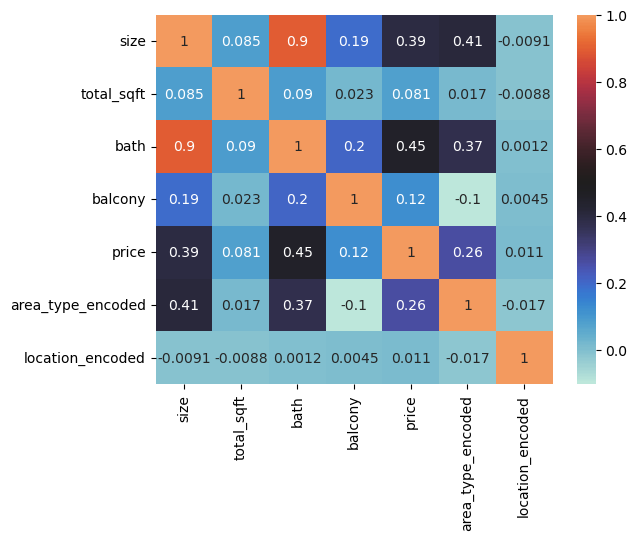

In [195]:
#Let's check their collinearity
sns.heatmap(df.corr(),annot=True,center=0.5)

### observation
- Not many columns are collinear with price.
- Let's consider size,area_type,bath,balcony

In [196]:
X=df[['size', 'bath', 'balcony','area_type_encoded',]]
y=df['price']


In [197]:
print(X.shape,y.shape)

(12788, 4) (12788,)


## Scaling

In [198]:
#using unit vectorization
from sklearn.preprocessing import normalize
X_scaled=normalize(X)
X_scaled.shape

(12788, 4)

## split the data


In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3)


In [200]:
print(X_train.shape,y_train.shape)

(8951, 4) (8951,)


## Hyper parameter Tuning

In [201]:
parameters={ 'C':[1,10,100],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma':['scale','auto'],
            'epsilon':[1,100,200]
}



In [202]:
from sklearn.svm import SVR
regressor=SVR()

In [203]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(regressor,param_grid=parameters,scoring='r2',n_jobs=-1,cv=5,verbose=100)

In [205]:
#Let's make the model
regressor=SVR(C=100,epsilon=100,gamma='scale',kernel='rbf')
regressor.fit(X_train,y_train)

SVR(C=100, epsilon=100)

In [206]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,regressor.predict(X_test)))
print(mean_squared_error(y_test,regressor.predict(X_test)))
print(r2_score(y_test,regressor.predict(X_test)))

78.84002447881556
18959.042418111432
0.07756672785445273


When developing an SVM (Support Vector Machine) regression model to predict house prices based on several characteristics, the choice of a regression metric depends on your specific objectives and the nature of your dataset. Some common regression metrics include:

1. **Mean Absolute Error (MAE)**:
   - MAE measures the average absolute difference between the predicted and actual values. It provides a straightforward interpretation as the average dollar amount by which your predictions are off.
   - MAE is suitable when you want a metric that is robust to outliers and provides a clear, understandable measure of prediction error in the same units as the target variable (e.g., dollars for house prices).

2. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the predicted and actual values. It punishes larger errors more than MAE because it squares the differences.
   - MSE is commonly used and has some mathematical advantages, but it might not be as interpretable as MAE since it's not in the same units as the target variable.

3. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of MSE. It has the advantage of being in the same units as the target variable, making it more interpretable.
   - RMSE is widely used and provides a good balance between MSE and MAE.

4. **R-squared (R2) Score**:
   - R2 measures the proportion of the variance in the target variable that is explained by the model. A higher R2 indicates a better fit.
   - R2 is useful when you want to understand how well your features explain the variability in house prices. However, it doesn't provide a direct measure of prediction accuracy.

The best regression metric for your situation depends on your specific goals and the characteristics of your dataset. Here are some considerations:

- **MAE or RMSE** might be preferred if you want easily interpretable metrics in the same units as house prices and you want to understand the typical prediction error.

- **MSE or RMSE** might be appropriate if you want a metric that penalizes larger errors more heavily and are not concerned about the interpretability of the metric.

- **R2** is useful for understanding how well your features explain the variance in house prices but doesn't provide direct information about prediction accuracy. It's often used in combination with other metrics.

It's a good practice to consider multiple metrics when evaluating your regression model to get a more comprehensive view of its performance. Choose the metric that aligns with your specific objectives and interpretability requirements.

Q2

If your primary goal is to predict the actual price of a house as accurately as possible, then using the **Mean Squared Error (MSE)** would be the more appropriate evaluation metric.

Here's why:

- **MSE** directly measures the average squared difference between your predicted prices and the actual prices. It punishes larger errors more severely because it squares the differences. This means that the model is penalized for both underestimating and overestimating the house prices.

- The goal in regression is typically to minimize prediction error. MSE provides a direct measure of the average prediction error in the same units as the target variable (i.e., dollars in the case of house prices). Therefore, minimizing the MSE implies that you are striving to make your predictions as close as possible to the actual prices.

- When your primary goal is prediction accuracy, you want a metric that focuses on how well your model's predictions align with the true values, and MSE serves this purpose. Lower MSE values indicate a better fit and a more accurate model.

While **R-squared (R2)** is a valuable metric for understanding how well your features explain the variance in the target variable, it doesn't provide a direct measure of prediction accuracy. R2 is more suited for assessing the quality of the model in terms of feature selection and model fit. Therefore, when the main objective is prediction accuracy, MSE is a more appropriate choice as the evaluation metric.

Q3

When you have a dataset with a significant number of outliers, the most appropriate regression metric to use with your SVM model is the **Mean Absolute Error (MAE)**.

Here's why MAE is a good choice in this scenario:

1. **Robustness to Outliers**:
   MAE is robust to outliers because it measures the average absolute difference between the predicted and actual values. It doesn't square the differences like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE), which means that it doesn't excessively penalize large errors caused by outliers.

2. **Outlier-Resistant**:
   Unlike MSE and RMSE, which can be heavily influenced by a few extreme outlier values, MAE treats all errors, including those caused by outliers, with equal weight. This is valuable when you have a dataset with a significant number of outliers.

3. **Interpretability**:
   MAE provides a straightforward and interpretable measure of the typical prediction error in the same units as the target variable. This makes it easier to understand and explain the model's performance.

While MAE is robust to outliers, it's still essential to be cautious when working with datasets that have significant outliers. You may also consider outlier detection and handling techniques to address the presence of outliers before applying the regression model, but using MAE as the evaluation metric is a good choice to focus on prediction accuracy without being overly influenced by extreme values.

Q4

If you have built an SVM regression model using a polynomial kernel and have calculated both the **Mean Squared Error (MSE)** and the **Root Mean Squared Error (RMSE)**, and you find that both values are very close, you can choose either metric based on your preference. In this scenario, the choice between MSE and RMSE won't significantly impact the evaluation of your model. Here's a brief overview of both:

- **MSE** measures the average squared difference between the predicted and actual values. It provides a measure of prediction accuracy, and smaller values indicate better fit. However, MSE is not in the same units as the target variable.

- **RMSE** is the square root of MSE. It is often chosen over MSE because it is in the same units as the target variable, making it more interpretable. Like MSE, smaller RMSE values indicate better fit.

Since the two metrics are very close and will likely provide similar insights into your model's performance, you can select RMSE if you prefer a metric that is in the same units as the target variable and is more interpretable. Alternatively, you can choose MSE if you are comfortable working with squared error values and you don't require the interpretation benefits of RMSE.

Ultimately, the choice between MSE and RMSE in this case is a matter of personal preference, and both metrics are suitable for evaluating the performance of your SVM regression model.

Q5

If your goal is to measure how well SVM regression models with different kernels explain the variance in the target variable, the most appropriate evaluation metric is the **R-squared (R2) score**.

Here's why the R2 score is a good choice in this context:

- **Measures Variance Explained**: R2 measures the proportion of the variance in the target variable that is explained by the model. A higher R2 indicates that a larger portion of the variance is explained by the model.

- **Interpretability**: R2 is easy to interpret. An R2 of 1.0 means that the model perfectly explains the variance, while an R2 of 0.0 means that the model doesn't explain any of the variance beyond the mean of the target variable.

- **Applicability Across Different Kernels**: R2 is a versatile metric that can be used to compare models with different kernels (linear, polynomial, RBF) and assess their ability to explain variance in the target variable consistently.

To evaluate the models based on their ability to explain variance, you can calculate the R2 score for each model and compare the scores. The model with the highest R2 score will be the one that best explains the variance in the target variable among the models you are comparing.